In [460]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import cross_val_score,train_test_split,GridSearchCV
from sklearn.externals import joblib
from sklearn.decomposition import PCA
from scipy.stats import zscore

In [461]:
#loading dataset
avacado= pd.read_excel('Avacado.xlsx')
avacado.head()

,S. No,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [462]:
avacado.drop('S. No',inplace=True,axis=1)
avacado.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [463]:
avacado.shape
avacado.columns

Index([        'Date', 'AveragePrice', 'Total Volume',           4046,
                 4225,           4770,   'Total Bags',   'Small Bags',
         'Large Bags',  'XLarge Bags',         'type',         'year',
             'region'],
      dtype='object')

In [464]:
avacado.dtypes

Date            datetime64[ns]
AveragePrice           float64
Total Volume           float64
4046                   float64
4225                   float64
4770                   float64
Total Bags             float64
Small Bags             float64
Large Bags             float64
XLarge Bags            float64
type                    object
year                     int64
region                  object
dtype: object

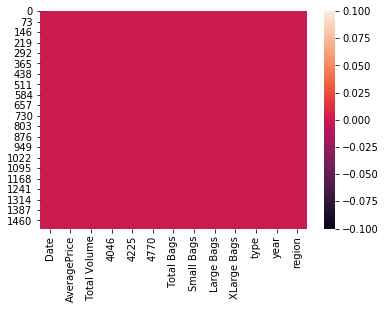

In [465]:
sns.heatmap(avacado.isnull())

Observation:
    No Null Values

In [466]:
avacado.groupby('year')['AveragePrice'].mean()

year
2015    1.060110
2016    1.151498
Name: AveragePrice, dtype: float64

In [467]:
avacado['year'].value_counts()

2015    1270
2016     247
Name: year, dtype: int64

In [468]:
avacado.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


Observation:
    there are outliners as difference between 75% and max is high

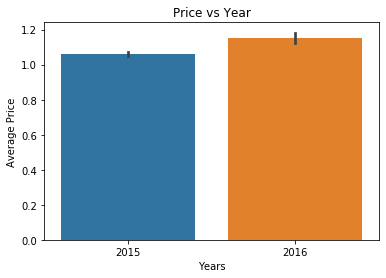

In [469]:
sns.barplot(x="year",y="AveragePrice",data=avacado)
plt.title('Price vs Year')
plt.xlabel('Years')
plt.ylabel('Average Price')
plt.show()

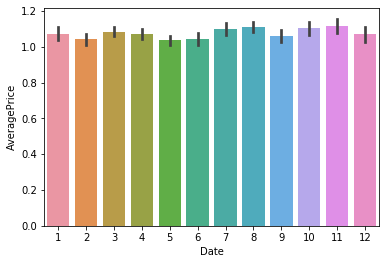

In [470]:
sns.barplot(x=avacado['Date'].dt.month,y='AveragePrice',data=avacado)

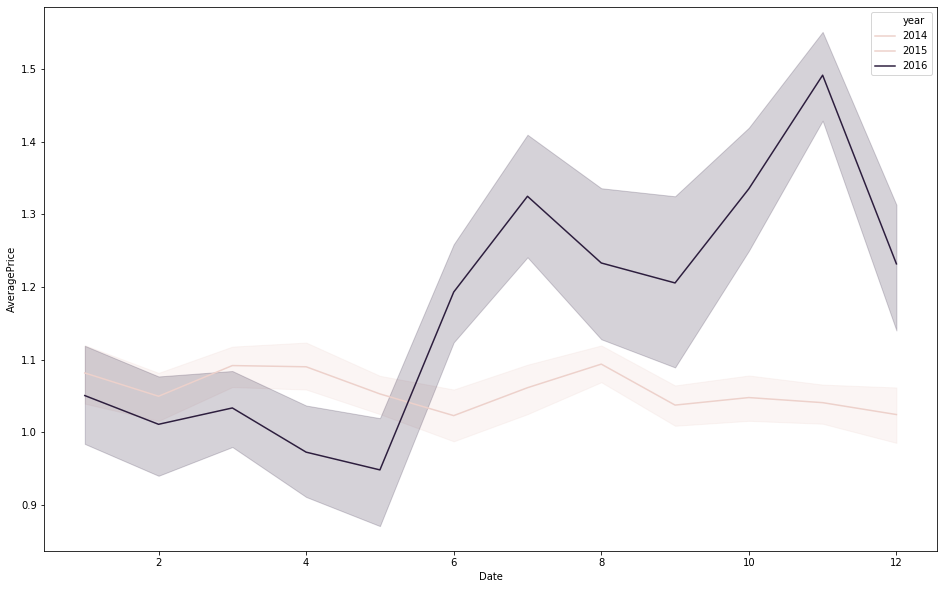

In [471]:
plt.figure(figsize=(16,10))
sns.lineplot(x=avacado['Date'].dt.month,y='AveragePrice',hue='year',data=avacado)
plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000000487FA748>,
      dtype=object)

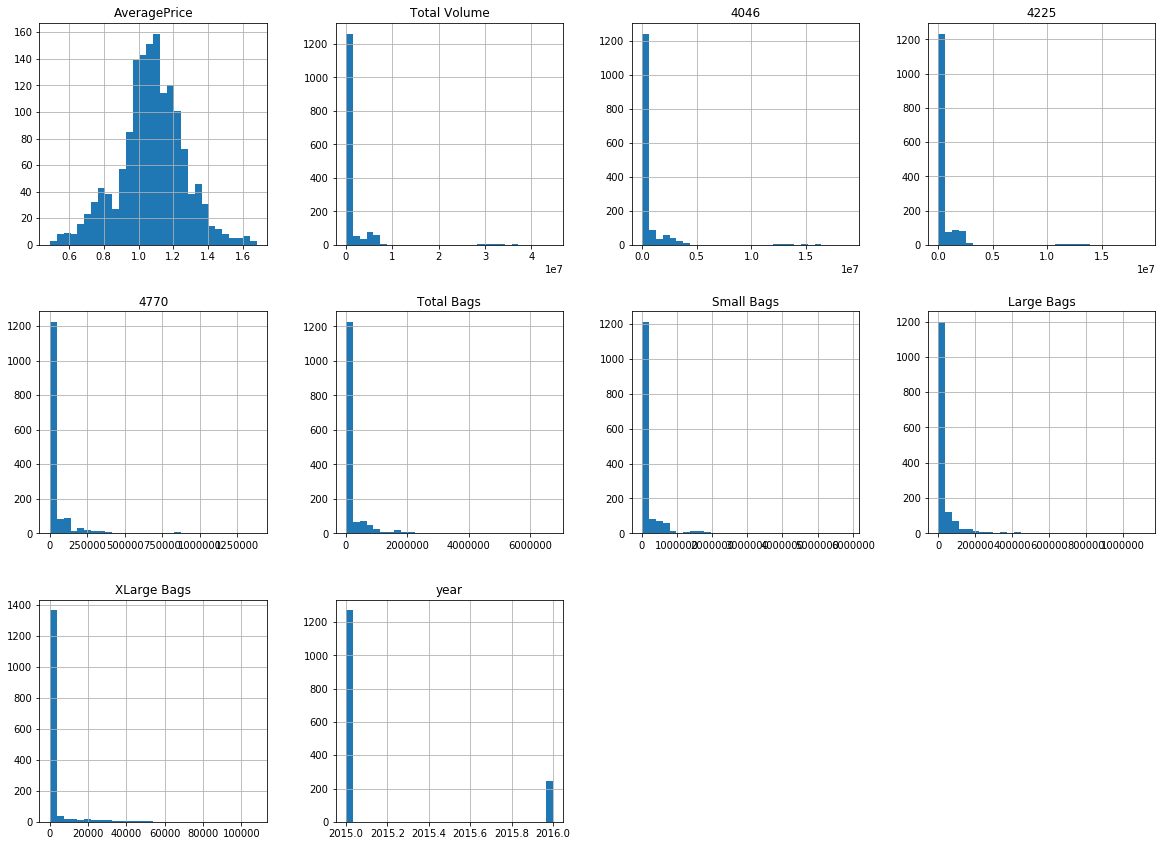

In [472]:
avacado.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

observation:
    average price is ND, almost all other features are left skewed

In [473]:
avacado.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
dtype: float64

In [474]:
#reducing skewness
skew=('Total Volume',4046,4225,4770,'Total Bags','Small Bags','Large Bags','XLarge Bags')
for col in skew:
    if avacado.skew().loc[col]>0.55:
        avacado[col]=np.log1p(avacado[col])

In [475]:
avacado.skew()

AveragePrice   -0.109444
Total Volume    0.667468
4046           -0.160268
4225            0.184436
4770           -0.355508
Total Bags      0.695502
Small Bags      0.713843
Large Bags     -0.912766
XLarge Bags     0.783913
year            1.828332
dtype: float64

In [476]:
#encoded catrgorical varibles
le= LabelEncoder()
avacado['region'] = le.fit_transform(avacado['region'])
avacado['type'] = le.fit_transform(avacado['type'])
avacado

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,11.070344,6.944801,10.905146,3.895080,9.070833,9.060055,4.545951,0.000000,0,2015,0
1,2015-12-20,1.35,10.912867,6.515127,10.706381,4.083115,9.159737,9.149429,4.589955,0.000000,0,2015,0
2,2015-12-13,0.93,11.680313,6.679222,11.600485,4.879007,9.005325,8.992584,4.645736,0.000000,0,2015,0
3,2015-12-06,1.08,11.277116,7.032624,11.184108,4.298373,8.667708,8.644425,4.903495,0.000000,0,2015,0
4,2015-11-29,1.28,10.840377,6.848515,10.688288,4.340944,8.729874,8.697389,5.291746,0.000000,0,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,2016-10-16,1.39,12.159227,10.960064,10.939651,9.771828,10.992377,10.795988,9.245288,5.485958,0,2016,7
1513,2016-10-09,1.51,12.090868,10.676528,10.862658,9.874088,11.055667,10.909713,9.059234,0.000000,0,2016,7
1514,2016-10-02,1.48,12.091850,10.744316,10.876052,9.725432,11.041589,10.884322,9.019078,6.716595,0,2016,7
1515,2016-09-25,1.47,12.150203,10.898807,10.889203,9.769752,11.065587,10.926918,9.021509,0.000000,0,2016,7


In [477]:
avacado_x=avacado.drop(['Date','type'],axis=1)

In [478]:
#checking Outliers
z=np.abs(zscore(avacado_x))

In [479]:
threshhold=3
print(np.where(z>3))

(array([ 760, 1182, 1182, 1182, 1183, 1183, 1183, 1184, 1184, 1184, 1185,
       1185, 1185, 1186, 1186, 1186, 1187, 1188, 1188, 1188, 1189, 1189,
       1191, 1202, 1346, 1411, 1457, 1458], dtype=int64), array([0, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 1, 5, 6, 6, 1, 5, 6, 1, 5,
       5, 1, 4, 0, 0, 0], dtype=int64))


In [480]:
avacado_new=avacado_x[(z<3).all(axis=1)]

In [481]:
#no outliers, so we will use the avacado
print(avacado_x.shape,'\t',avacado_new.shape)

(1517, 11) 	 (1502, 11)


[]

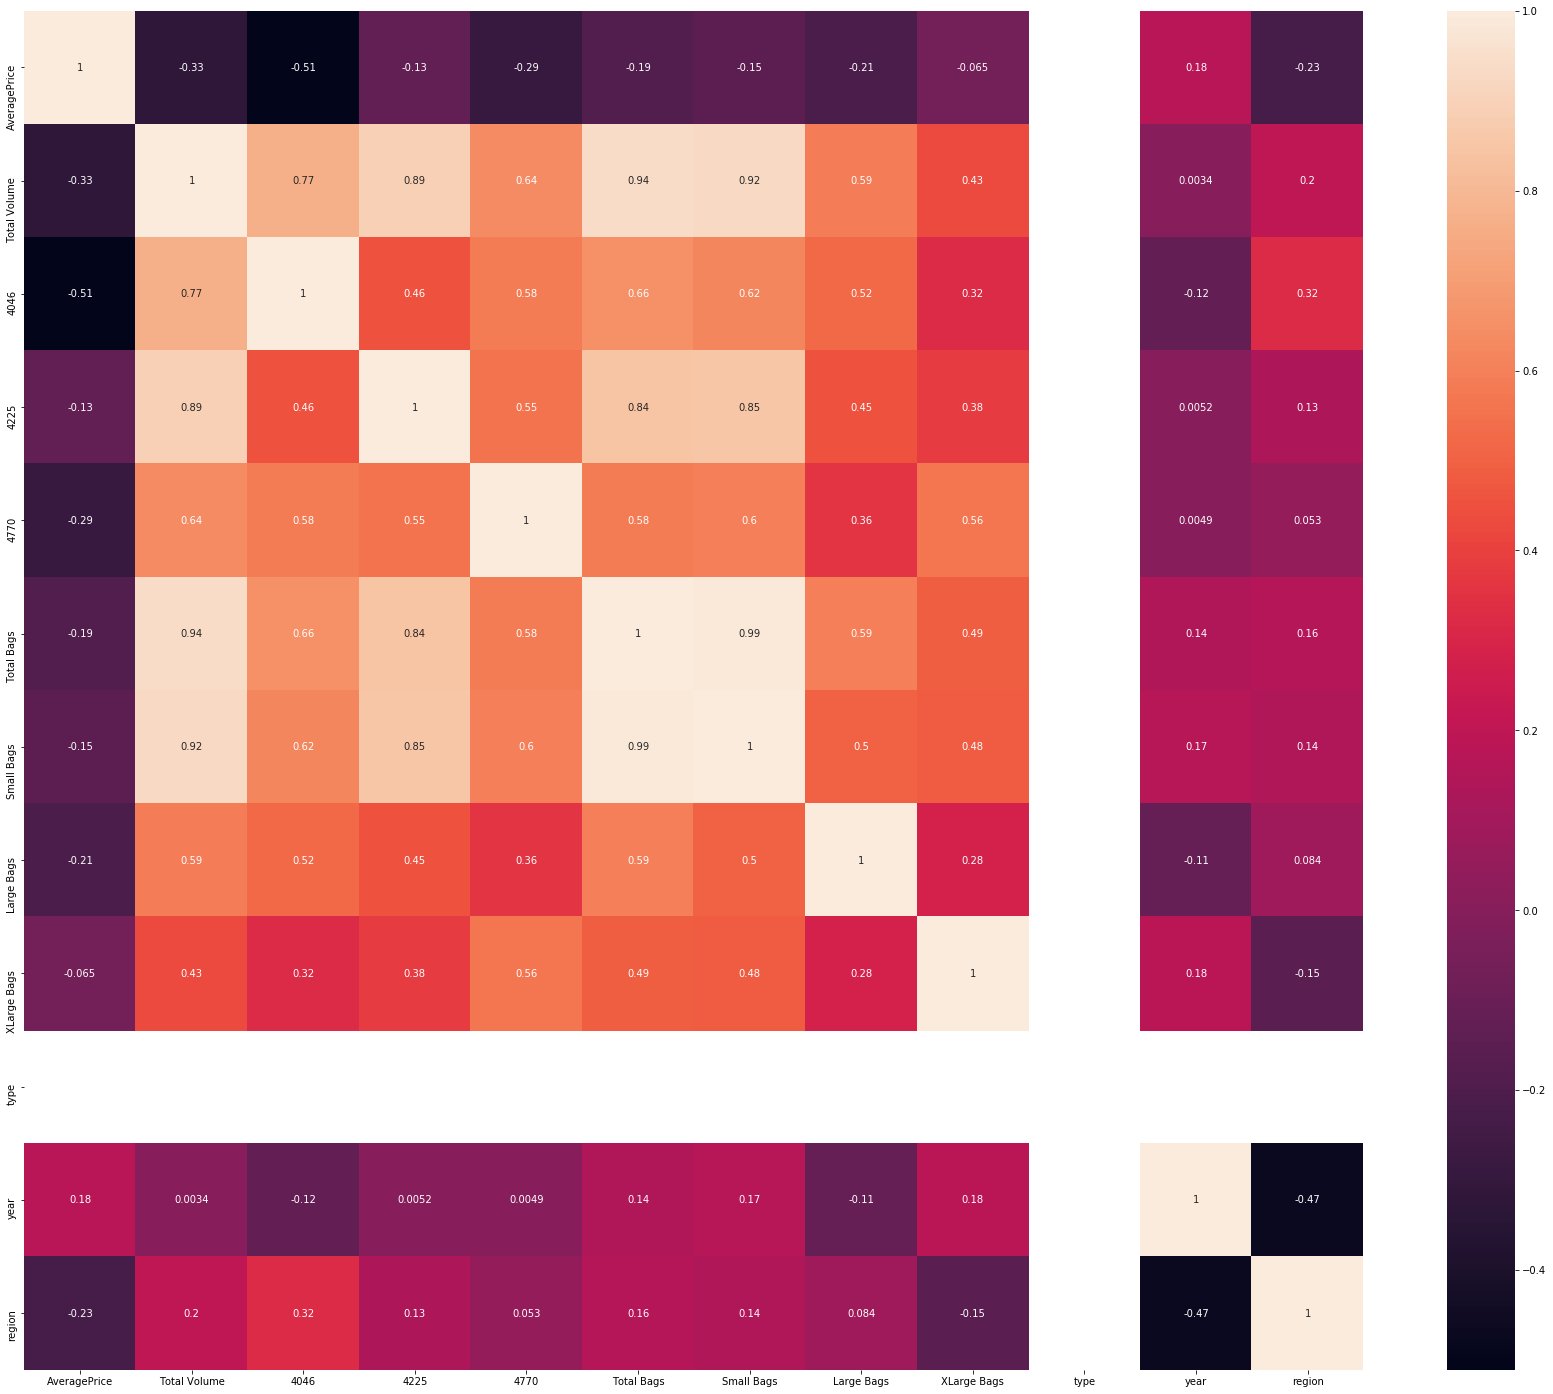

In [482]:
avacado_cor=avacado.corr()
plt.figure(figsize=(30,25))
sns.heatmap(avacado_cor,annot=True)
plt.plot()

### Predicting Average Price

In [483]:
x=avacado.drop(['Date','AveragePrice','type'],axis=1)
y=avacado.iloc[:,1].values

In [484]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x,y,test_size=0.2, random_state=1)


In [485]:
from sklearn.svm import SVR
model=[DecisionTreeRegressor(),KNeighborsRegressor(),AdaBoostRegressor(),LinearRegression(),GradientBoostingRegressor(),SVR(kernel = 'rbf')]
max_r2_score=0
for r_state in range(80,90):
    train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=r_state,test_size=0.33)
    sc = StandardScaler()
    x_train = sc.fit_transform(x_train)
    x_test = sc.transform(x_test)
    for i in model:
        i.fit(train_x,train_y)
        per=i.predict(test_x)
        r2_sc=r2_score(test_y,per)
        print('R2 score correspond to random state',r_state,'is',r2_sc)
        if r2_sc>max_r2_score:
            final_state=r_state
            final_model=i

print()
print()
print()
print()
print("max R2 score correspond to random state ",final_state,'is',max_r2_score,'and model is',final_model)

R2 score correspond to random state 80 is 0.6287594357195609
R2 score correspond to random state 80 is 0.701977818174091
R2 score correspond to random state 80 is 0.5695420689471826
R2 score correspond to random state 80 is 0.3902319917695266
R2 score correspond to random state 80 is 0.7173064587902019
R2 score correspond to random state 80 is 0.03038235092772612
R2 score correspond to random state 81 is 0.5537128721126733
R2 score correspond to random state 81 is 0.7016603122388039
R2 score correspond to random state 81 is 0.5672985938092858
R2 score correspond to random state 81 is 0.34838214113675736
R2 score correspond to random state 81 is 0.6904146320747435
R2 score correspond to random state 81 is 0.03488404675201229
R2 score correspond to random state 82 is 0.6646605205213179
R2 score correspond to random state 82 is 0.7391598556433804
R2 score correspond to random state 82 is 0.5828198071650743
R2 score correspond to random state 82 is 0.4251271649812889
R2 score correspond to

In [486]:
train_x,test_x,train_y,test_y=train_test_split(x,y,random_state=89,test_size=0.33)
SVC =  SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
SVC.fit(train_x,train_y)
prediction=GBR.predict(test_x)
r2_sc=r2_score(test_y,prediction)
print('R2 Score:',r2_sc*100)

R2 Score: 70.58510587620366


In [487]:
print ('Mean Absolute Error: ',mean_absolute_error(test_y,prediction))
print ('Mean Squared Error: ',mean_squared_error(test_y,prediction))
print ('Root Mean Absolute Error: ',np.sqrt(mean_absolute_error(test_y,prediction)))

Mean Absolute Error:  0.07547090450128434
Mean Squared Error:  0.009912753810315755
Root Mean Absolute Error:  0.27471968349807835


Text(0, 0.5, 'Predicted_Y')

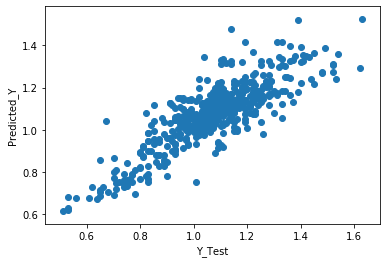

In [488]:
plt.scatter(x=test_y,y=prediction)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

### Predicting Region

In [489]:
from sklearn.metrics import accuracy_score,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [490]:
x_c=avacado.drop(columns=['region','Date'])
y_c=avacado[['region']]

In [491]:
sc=StandardScaler()
x_c= sc.fit_transform(x_c)

In [492]:
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
model = [DecisionTreeClassifier(),KNeighborsClassifier(),SVC(kernel = 'rbf', random_state = 0),GaussianNB(),RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)]
max_accuracy_score=0
for r_state in range(80,90):
    train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state=r_state,test_size=0.20)
    sc = StandardScaler()
    train_xc = sc.fit_transform(train_xc)
    test_xc = sc.transform(test_xc)
    for i_c in model:
        i_c.fit(train_xc,train_yc)
        pre_c=i_c.predict(test_xc)
        ac_score=accuracy_score(test_yc,pre_c)
        print ("accuracy score correspond to random state " ,r_state,'is,ac_score')
        if ac_score>max_accuracy_score:
            max_accuracy_score=ac_score
            final_state=r_state
            final_model=i_c

print()
print()
print()
print()

print('max accuracy score correspond to random state',final_state,'is',max_accuracy_score,'and model is',final_model)

accuracy score correspond to random state  80 is,ac_score
accuracy score correspond to random state  80 is,ac_score
accuracy score correspond to random state  80 is,ac_score
accuracy score correspond to random state  80 is,ac_score
accuracy score correspond to random state  80 is,ac_score
accuracy score correspond to random state  81 is,ac_score
accuracy score correspond to random state  81 is,ac_score
accuracy score correspond to random state  81 is,ac_score
accuracy score correspond to random state  81 is,ac_score
accuracy score correspond to random state  81 is,ac_score
accuracy score correspond to random state  82 is,ac_score
accuracy score correspond to random state  82 is,ac_score
accuracy score correspond to random state  82 is,ac_score
accuracy score correspond to random state  82 is,ac_score
accuracy score correspond to random state  82 is,ac_score
accuracy score correspond to random state  83 is,ac_score
accuracy score correspond to random state  83 is,ac_score
accuracy score

In [493]:
train_xc,test_xc,train_yc,test_yc = train_test_split(x_c,y_c,random_state=82,test_size=0.20)
RFC=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)
RFC.fit(train_xc,train_yc)
predictionregion=KNC.predict(test_xc)
auc_score=accuracy_score(test_yc,predictionregion)
print('Accuracy Score:',auc_score*100)

Accuracy Score: 94.73684210526315


In [494]:
score=cross_val_score(RFC,x_c,y_c,scoring='accuracy').mean()
print('Cross Val Score:',score*100)
print('Mean Score:',score.mean()*100)
print('STD Score:',score.std())

Cross Val Score: 89.19120201493833
Mean Score: 89.19120201493833
STD Score: 0.0


In [495]:
predct_problem=RFC.predict_proba(test_xc)[:,1]
predct_problem

array([0. , 0.1, 0. , 0. , 1. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0.2, 0. , 0. , 0. , 0. , 0. , 0.4, 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0.8, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. ,
       0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.9,
       0. , 0.5, 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0. , 0.

In [496]:
fpr,tpr,thresholds=roc_curve(test_yc,predct_problem,pos_label=True)

In [497]:
print(fpr)
print('\n')
print(tpr)
print('\n')
print(thresholds)

[0.         0.         0.         0.         0.00337838 0.01351351
 0.01689189 0.04391892 1.        ]


[0.    0.125 0.625 0.875 0.875 1.    1.    1.    1.   ]


[2.  1.  0.8 0.5 0.4 0.3 0.2 0.1 0. ]


<function matplotlib.pyplot.show(*args, **kw)>

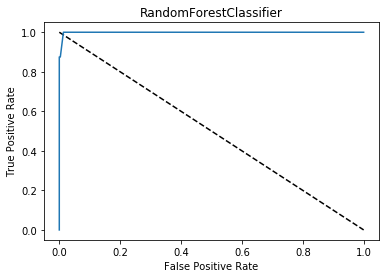

In [498]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('RandomForestClassifier')
plt.show